In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


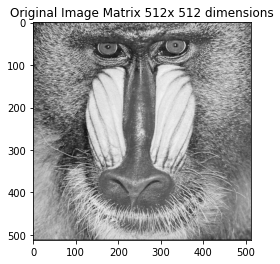

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2 
from random import randrange
# Reference Image
imagec = cv2.imread('/content/drive/MyDrive/Colab Notebooks/babbon.bmp')# My reference Image
image=np.dot(imagec[...,:3], [0.2989, 0.5870, 0.1140])
row,col= image.shape
plt.title("Original Image Matrix %1.0f" %row + "x %1.0f" %col+" dimensions" )
plt.imshow(image,cmap=plt.get_cmap('gray'))

In [ ]:
def gauss_noise_adder(image):
      row,col,ch= image.shape
      mean = 0                        # mean of noise
      var = 0.01
      sigma = var**0.5                # standard deviation of noise
      gaussian = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gaussian.reshape(row,col,ch)
      A = np.double(image)
      out = np.zeros(A.shape, np.double)
      normalized = cv2.normalize(A, out, 1.0, 0.0, cv2.NORM_MINMAX)
      noise = normalized+gauss
      noise=(noise*255).astype(np.uint8)
      return noise


def psnr(image1,image2):
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(np.mean( (image1 - image2) ** 2 )))

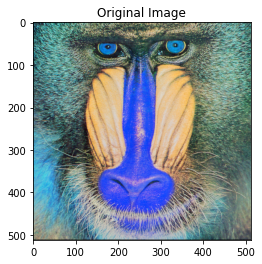

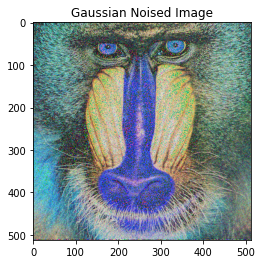

In [ ]:
image2=gauss_noise_adder(imagec)
plt.figure()
plt.title('Original Image')
plt.imshow(imagec)
plt.figure()
plt.title('Gaussian Noised Image')
plt.imshow(image2)

In [ ]:
PSNR=psnr(imagec,image2)
print("PSNR of Image#01 and Image#02 is %1.0f" %PSNR)

PSNR of Image#01 and Image#02 is 28


In [ ]:
# Replaceing image with 28 PSNR version of it
imagec=image2

In [ ]:
# K-Means algorithm based on idea to take mean of positions of cluster samples
def KMeaner(image,k,iterations=1):
  image_dup=np.copy(image)
  a,b=image.shape
  label_mat=np.zeros((a,b))
  image_mat_k=np.zeros((a,b,k))
  label_mat_k=np.zeros((a,b,k))
  result=0

  for x in range(k):
    image_mat_k[:,:,x]=image

    for iter in range(iterations):
      image_mat_k=np.zeros((a,b,k))
      image_mat_k=np.zeros((a,b,k))
      label_mat_k=np.zeros((a,b,k))
      X=[]
      Y=[]
      I=[]
      if (iter==0):
        for i in range(k):
          x=randrange(b)
          y=randrange(a)
          X.append(x)
          Y.append(y)
          I.append(image[x,y])
          I_temp=I
        for j in range(a):
          for i in range(b):
            D=min(I, key=lambda x:(abs(x-image[i,j])))
            I_temp[:] = [abs(pixel - D) for pixel in I_temp]
            label_mat[i,j]=I_temp.index(min(I_temp))

      for x in range(k):
        image_mat_k[:,:,x]=image
        label_mat_k[:,:,x]=label_mat


      for k_i in range(k):
        image_mat_k[:,:,k_i] = np.where(label_mat!=k_i, 0, image_mat_k[:,:,k_i])
        label_mat_k[:,:,k_i] = np.where(label_mat!=k_i, 0, label_mat_k[:,:,k_i])
        numerator=np.sum(image_mat_k[:,:,k_i])
        denomenator=np.sum(label_mat_k[:,:,k_i])
        mean=numerator/(denomenator+0.01)
        result = np.where(abs(image_dup-mean) == np.amin(abs(image_dup-mean)))
      
        listOfCordinates = list(zip(result[0], result[1]))
        chips=listOfCordinates[0]
        X.append(chips[0])
        Y.append(chips[1])
        I.append(image[chips[0],chips[1]])

      I_temp=I

      for j in range(a):
        for i in range(b):
          D=min(I, key=lambda x:(abs(x-image[i,j])))
          I_temp[:] = [abs(pixel - D) for pixel in I_temp]
          label_mat[i,j]=I_temp.index(min(I_temp))


  
  X,Y

  return X,Y

In [ ]:
# A relatively simple implementation of KMeaner with same idea of taking mean of positions of cluster samples
def KMeaner_new(image,k,iterations=2):
  X=[]
  Y=[]

  for iter in range(iterations):
    if (iter==0):
      for i in range(k):
        a,b=image.shape
        x=randrange(b+1)
        y=randrange(a+1)
        X.append(x)
        Y.append(y)

    X_dum = [[] for i in range(k)]
    Y_dum = [[] for i in range(k)]
    dis_dum=np.zeros(k)
    
    a,b=image.shape
    for x in range(b):
      for y in range(a):
        for k_i in range(k):
          dis_dum[k_i]=abs(image[x,y]-image[X[k_i],Y[k_i]])
        X_dum[np.argmin(dis_dum)].append(x)
        Y_dum[np.argmin(dis_dum)].append(y)


    for i in range(k):
      x_r=int(sum(X_dum[i])/(len(X_dum[i])+0.0001))
      y_r=int(sum(Y_dum[i])/(len(Y_dum[i])+0.0001))
      if (x_r>b-1):
        X[i]=b-1

      else:
        X[i]=x_r

      if (y_r>a-1):
        Y[i]=a-1

      else:
        Y[i]=y_r

  return X,Y

In [ ]:
# K means algorithm based on idea of taking mean of pixel values of samples in clusters
def KMeaner_new2(image,k,iterations=2):
  X=[]
  Y=[]

  for iter in range(iterations):
    if (iter==0):
      for i in range(k):
        a,b=image.shape
        x=randrange(b+1)
        y=randrange(a+1)
        X.append(x)
        Y.append(y)


    I_dum=[[] for i in range(k)]
    dis_dum=np.zeros(k)
    
    a,b=image.shape
    for x in range(b):
      for y in range(a):
        for k_i in range(k):
          dis_dum[k_i]=abs(image[x,y]-image[X[k_i],Y[k_i]])
        I_dum[np.argmin(dis_dum)].append(image[x,y])


    for i in range(k):
      x_r=int(sum(I_dum[i])/(len(I_dum[i])+0.0001))
      L=abs(image-x_r)
      x,y = np.unravel_index(np.argmin(L),L.shape)
      X[i]=x
      Y[i]=y

  return X,Y

**K-means_Implementation 1**

Gray Scale based determination of centroids and extrapolating them for all RGB layers

In [ ]:
# 2 iterations
k=6
# X,Y=KMeaner_new2(image,k,iterations=2)
# X,Y=KMeaner_new(image,k,iterations=2)
X,Y=KMeaner(image,k,iterations=2)
Pixelians=[]

for i in range(len(X)):
  Pixelians.append(imagec[X[i],Y[i],:])


le,wid,ch=imagec.shape
dis_min_finder=np.zeros(len(Pixelians))
image_seg=np.copy(imagec)

for y in range(le):
  for x in range(wid):
    for i in range(len(Pixelians)):
      ref=Pixelians[i]
      cur=imagec[x,y,:]
      dist_i=np.linalg.norm(ref-cur)
      dis_min_finder[i]=dist_i

    indx=np.argmin(dis_min_finder)
    image_seg[x,y,:]=Pixelians[indx]



Text(0.5, 1.0, 'K-Means Segmented with K=6')

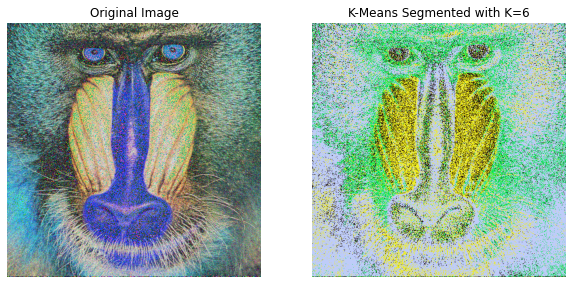

In [ ]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2
  
fig.add_subplot(rows, columns, 1)
  
plt.imshow(imagec)
plt.axis('off')
plt.title("Original Image")
  
fig.add_subplot(rows, columns, 2)
  

plt.imshow(image_seg)
plt.axis('off')
plt.title("K-Means Segmented with K=%1.0f" %k)
  

Determination of centroids for individual RGB layers

In [ ]:
# 2 iterations
k=6
# X,Y=KMeaner_new2(image,k,iterations=2)
# X,Y=KMeaner_new(image,k,iterations=2)
X1,Y1=KMeaner(imagec[:,:,0],k,iterations=2)
X2,Y2=KMeaner(imagec[:,:,1],k,iterations=2)
X3,Y3=KMeaner(imagec[:,:,2],k,iterations=2)
Pixelians1=[]
Pixelians2=[]
Pixelians3=[]

for i in range(len(X)):
  Pixelians1.append(imagec[X1[i],Y1[i],0])
  Pixelians2.append(imagec[X2[i],Y2[i],1])
  Pixelians3.append(imagec[X3[i],Y3[i],2])


le,wid,ch=imagec.shape
dis_min_finder1=np.zeros(len(Pixelians1))
dis_min_finder2=np.zeros(len(Pixelians2))
dis_min_finder3=np.zeros(len(Pixelians3))
image_seg=np.copy(imagec)

for y in range(le):
  for x in range(wid):
    for i in range(len(Pixelians1)):
      ref1=Pixelians1[i]
      ref2=Pixelians2[i]
      ref3=Pixelians3[i]
      cur1=imagec[x,y,0]
      cur2=imagec[x,y,1]
      cur3=imagec[x,y,2]
      dist_1=np.linalg.norm(ref1-cur1)
      dist_2=np.linalg.norm(ref2-cur2)
      dist_3=np.linalg.norm(ref3-cur3)
      dis_min_finder1[i]=dist_1
      dis_min_finder2[i]=dist_2
      dis_min_finder3[i]=dist_3

    indx1=np.argmin(dis_min_finder1)
    indx2=np.argmin(dis_min_finder2)
    indx3=np.argmin(dis_min_finder3)
    image_seg[x,y,0]=Pixelians1[indx1]
    image_seg[x,y,1]=Pixelians2[indx2]
    image_seg[x,y,2]=Pixelians3[indx3]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in ubyte_scalars


Text(0.5, 1.0, 'K-Means Segmented with K=6')

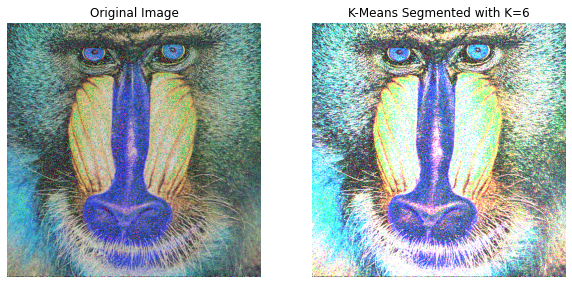

In [ ]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2
  
fig.add_subplot(rows, columns, 1)
  
plt.imshow(imagec)
plt.axis('off')
plt.title("Original Image")
  
fig.add_subplot(rows, columns, 2)
  

plt.imshow(image_seg)
plt.axis('off')
plt.title("K-Means Segmented with K=%1.0f" %k)

**K means 2**

Gray Scale based determination of centroids and extrapolating them for all RGB layers

In [ ]:
# 2 iterations
k=6
# X,Y=KMeaner_new2(image,k,iterations=2)
X,Y=KMeaner_new(image,k,iterations=2)
# X,Y=KMeaner(image,k,iterations=2)
Pixelians=[]

for i in range(len(X)):
  Pixelians.append(imagec[X[i],Y[i],:])


le,wid,ch=imagec.shape
dis_min_finder=np.zeros(len(Pixelians))
image_seg=np.copy(imagec)

for y in range(le):
  for x in range(wid):
    for i in range(len(Pixelians)):
      ref=Pixelians[i]
      cur=imagec[x,y,:]
      dist_i=np.linalg.norm(ref-cur)
      dis_min_finder[i]=dist_i

    indx=np.argmin(dis_min_finder)
    image_seg[x,y,:]=Pixelians[indx]

Text(0.5, 1.0, 'K-Means Segmented with K=6')

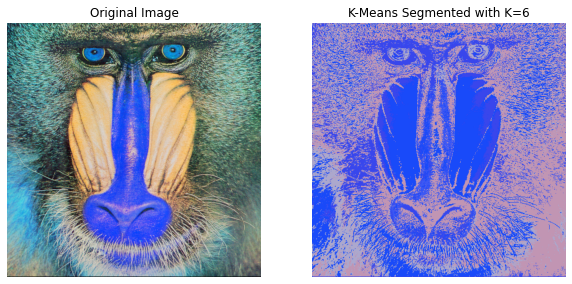

In [ ]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2
  
fig.add_subplot(rows, columns, 1)
  
plt.imshow(imagec)
plt.axis('off')
plt.title("Original Image")
  
fig.add_subplot(rows, columns, 2)
  

plt.imshow(image_seg)
plt.axis('off')
plt.title("K-Means Segmented with K=%1.0f" %k)

Determination of centroids for individual RGB layers

In [ ]:
# 2 iterations
k=6
# X,Y=KMeaner_new2(image,k,iterations=2)
# X,Y=KMeaner_new(image,k,iterations=2)
X1,Y1=KMeaner_new(imagec[:,:,0],k,iterations=2)
X2,Y2=KMeaner_new(imagec[:,:,1],k,iterations=2)
X3,Y3=KMeaner_new(imagec[:,:,2],k,iterations=2)
Pixelians1=[]
Pixelians2=[]
Pixelians3=[]

for i in range(len(X)):
  Pixelians1.append(imagec[X1[i],Y1[i],0])
  Pixelians2.append(imagec[X2[i],Y2[i],1])
  Pixelians3.append(imagec[X3[i],Y3[i],2])


le,wid,ch=imagec.shape
dis_min_finder1=np.zeros(len(Pixelians1))
dis_min_finder2=np.zeros(len(Pixelians2))
dis_min_finder3=np.zeros(len(Pixelians3))
image_seg=np.copy(imagec)

for y in range(le):
  for x in range(wid):
    for i in range(len(Pixelians1)):
      ref1=Pixelians1[i]
      ref2=Pixelians2[i]
      ref3=Pixelians3[i]
      cur1=imagec[x,y,0]
      cur2=imagec[x,y,1]
      cur3=imagec[x,y,2]
      dist_1=np.linalg.norm(ref1-cur1)
      dist_2=np.linalg.norm(ref2-cur2)
      dist_3=np.linalg.norm(ref3-cur3)
      dis_min_finder1[i]=dist_1
      dis_min_finder2[i]=dist_2
      dis_min_finder3[i]=dist_3

    indx1=np.argmin(dis_min_finder1)
    indx2=np.argmin(dis_min_finder2)
    indx3=np.argmin(dis_min_finder3)
    image_seg[x,y,0]=Pixelians1[indx1]
    image_seg[x,y,1]=Pixelians2[indx2]
    image_seg[x,y,2]=Pixelians3[indx3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in ubyte_scalars


Text(0.5, 1.0, 'K-Means Segmented with K=6')

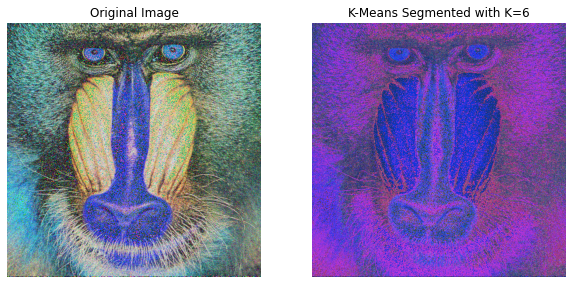

In [ ]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2
  
fig.add_subplot(rows, columns, 1)
  
plt.imshow(imagec)
plt.axis('off')
plt.title("Original Image")
  
fig.add_subplot(rows, columns, 2)
  

plt.imshow(image_seg)
plt.axis('off')
plt.title("K-Means Segmented with K=%1.0f" %k)

**Implementation 3**

In [ ]:
# 2 iterations
k=6
X,Y=KMeaner_new2(image,k,iterations=2)

# X,Y=KMeaner(image,k,iterations=2)
Pixelians=[]

for i in range(len(X)):
  Pixelians.append(imagec[X[i],Y[i],:])


le,wid,ch=imagec.shape
dis_min_finder=np.zeros(len(Pixelians))
image_seg=np.copy(imagec)

for y in range(le):
  for x in range(wid):
    for i in range(len(Pixelians)):
      ref=Pixelians[i]
      cur=imagec[x,y,:]
      dist_i=np.linalg.norm(ref-cur)
      dis_min_finder[i]=dist_i

    indx=np.argmin(dis_min_finder)
    image_seg[x,y,:]=Pixelians[indx]

Text(0.5, 1.0, 'K-Means Segmented with K=6')

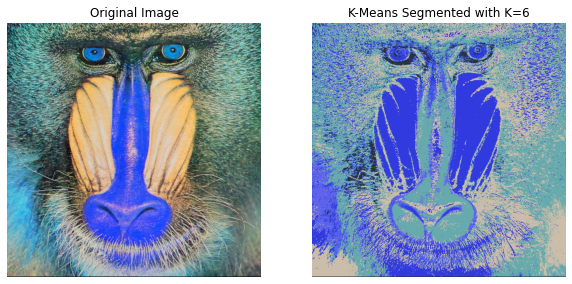

In [ ]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2
  
fig.add_subplot(rows, columns, 1)
  
plt.imshow(imagec)
plt.axis('off')
plt.title("Original Image")
  
fig.add_subplot(rows, columns, 2)
  

plt.imshow(image_seg)
plt.axis('off')
plt.title("K-Means Segmented with K=%1.0f" %k)

In [ ]:
# 2 iterations
k=6
# X,Y=KMeaner_new2(image,k,iterations=2)
# X,Y=KMeaner_new(image,k,iterations=2)
X1,Y1=KMeaner_new2(imagec[:,:,0],k,iterations=2)
X2,Y2=KMeaner_new2(imagec[:,:,1],k,iterations=2)
X3,Y3=KMeaner_new2(imagec[:,:,2],k,iterations=2)
Pixelians1=[]
Pixelians2=[]
Pixelians3=[]

for i in range(len(X)):
  Pixelians1.append(imagec[X1[i],Y1[i],0])
  Pixelians2.append(imagec[X2[i],Y2[i],1])
  Pixelians3.append(imagec[X3[i],Y3[i],2])


le,wid,ch=imagec.shape
dis_min_finder1=np.zeros(len(Pixelians1))
dis_min_finder2=np.zeros(len(Pixelians2))
dis_min_finder3=np.zeros(len(Pixelians3))
image_seg=np.copy(imagec)

for y in range(le):
  for x in range(wid):
    for i in range(len(Pixelians1)):
      ref1=Pixelians1[i]
      ref2=Pixelians2[i]
      ref3=Pixelians3[i]
      cur1=imagec[x,y,0]
      cur2=imagec[x,y,1]
      cur3=imagec[x,y,2]
      dist_1=np.linalg.norm(ref1-cur1)
      dist_2=np.linalg.norm(ref2-cur2)
      dist_3=np.linalg.norm(ref3-cur3)
      dis_min_finder1[i]=dist_1
      dis_min_finder2[i]=dist_2
      dis_min_finder3[i]=dist_3

    indx1=np.argmin(dis_min_finder1)
    indx2=np.argmin(dis_min_finder2)
    indx3=np.argmin(dis_min_finder3)
    image_seg[x,y,0]=Pixelians1[indx1]
    image_seg[x,y,1]=Pixelians2[indx2]
    image_seg[x,y,2]=Pixelians3[indx3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in ubyte_scalars


Text(0.5, 1.0, 'K-Means Segmented with K=6')

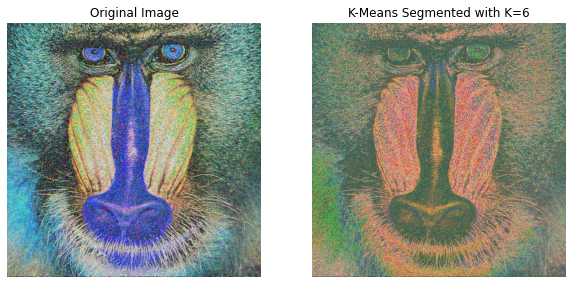

In [ ]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2
  
fig.add_subplot(rows, columns, 1)
  
plt.imshow(imagec)
plt.axis('off')
plt.title("Original Image")
  
fig.add_subplot(rows, columns, 2)
  

plt.imshow(image_seg)
plt.axis('off')
plt.title("K-Means Segmented with K=%1.0f" %k)

# **Mean Shift**

Position update on each iteration

In [ ]:
def MeanShifter(image,k,iterations=2,threshold=50):

  X=[]
  Y=[]
 
  for iter in range(iterations):
    if (iter==0):
      for i in range(k):
        a,b=image.shape
        x=randrange(b+1)
        y=randrange(a+1)
        X.append(x)
        Y.append(y)
    X_dum = [[] for i in range(k)]
    Y_dum = [[] for i in range(k)]
    
    a,b=image.shape
    for k_i in range(k-1):
      for x in range(b):
        for y in range(a):
          if(abs(image[X[k_i],Y[k_i]]-image[x,y])<threshold):
            X_dum[k_i].append(x)
            Y_dum[k_i].append(y)

    for i in range(k):
      x_r=X[i]+int(sum(X_dum[i])/(len(X_dum[i])+0.001))
      y_r=Y[i]+int(sum(Y_dum[i])/(len(Y_dum[i])+0.001))

      if (x_r>b-1):
        X[i]=b-1

      else:
        X[i]=x_r

      if (y_r>a-1):
        Y[i]=a-1

      else:
        Y[i]=y_r



  return X,Y

Pixel value  update on each iteration

In [ ]:
def MeanShifter2(image,k,iterations=2,threshold=50):

  X=[]
  Y=[]
 
  for iter in range(iterations):
    if (iter==0):
      for i in range(k):
        a,b=image.shape
        x=randrange(b+1)
        y=randrange(a+1)
        X.append(x)
        Y.append(y)
    I_dum=[[] for i in range(k)]
    
    a,b=image.shape
    for k_i in range(k-1):
      for x in range(b):
        for y in range(a):
          if (abs(image[X[k_i],Y[k_i]]-image[x,y])<threshold):
            I_dum[k_i].append(image[x,y])

    for i in range(k):
      x_r=image[X[i],Y[i]]+int(sum(I_dum[i])/(len(I_dum[i])+0.001))

      L=abs(image-x_r)
      x,y = np.unravel_index(np.argmin(L),L.shape)
      X[i]=x
      Y[i]=y


  return X,Y

**Mean Shift 1**

Gray Scale based determination of centroids and extrapolating them for all RGB layers

In [ ]:
k=6
X,Y=MeanShifter(image,k,iterations=2,threshold=60)
#X,Y=MeanShifter2(image,k,iterations=2,threshold=60)

Pixelians=[]

for i in range(len(X)):
  Pixelians.append(imagec[X[i],Y[i],:])


le,wid,ch=imagec.shape
dis_min_finder=np.zeros(len(Pixelians))
image_seg_2=np.copy(imagec)

for y in range(le):
  for x in range(wid):
    for i in range(len(Pixelians)):
      ref=Pixelians[i]
      cur=imagec[x,y,:]
      dist_i=np.linalg.norm(ref-cur)
      dis_min_finder[i]=dist_i

    indx=np.argmin(dis_min_finder)
    image_seg_2[x,y,:]=Pixelians[indx]

Text(0.5, 1.0, 'mean-shifted Segmented with classes=6')

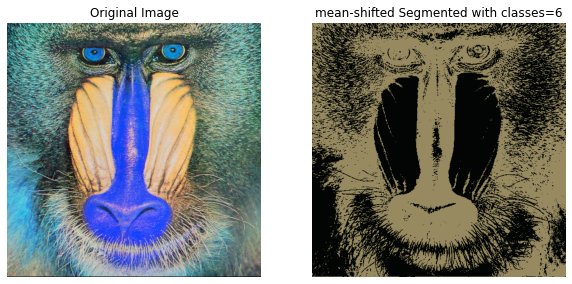

In [ ]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2
  
fig.add_subplot(rows, columns, 1)
  
plt.imshow(imagec)
plt.axis('off')
plt.title("Original Image")
  
fig.add_subplot(rows, columns, 2)
  

plt.imshow(image_seg_2)
plt.axis('off')
plt.title("mean-shifted Segmented with classes=%1.0f" %k)

Determination of centroids for individual RGB layers

In [ ]:
# 2 iterations
k=6

X1,Y1=MeanShifter(imagec[:,:,0],k,iterations=2,threshold=60)
X2,Y2=MeanShifter(imagec[:,:,1],k,iterations=2,threshold=60)
X3,Y3=MeanShifter(imagec[:,:,2],k,iterations=2,threshold=60)
Pixelians1=[]
Pixelians2=[]
Pixelians3=[]

for i in range(len(X)):
  Pixelians1.append(imagec[X1[i],Y1[i],0])
  Pixelians2.append(imagec[X2[i],Y2[i],1])
  Pixelians3.append(imagec[X3[i],Y3[i],2])


le,wid,ch=imagec.shape
dis_min_finder1=np.zeros(len(Pixelians1))
dis_min_finder2=np.zeros(len(Pixelians2))
dis_min_finder3=np.zeros(len(Pixelians3))
image_seg=np.copy(imagec)

for y in range(le):
  for x in range(wid):
    for i in range(len(Pixelians1)):
      ref1=Pixelians1[i]
      ref2=Pixelians2[i]
      ref3=Pixelians3[i]
      cur1=imagec[x,y,0]
      cur2=imagec[x,y,1]
      cur3=imagec[x,y,2]
      dist_1=np.linalg.norm(ref1-cur1)
      dist_2=np.linalg.norm(ref2-cur2)
      dist_3=np.linalg.norm(ref3-cur3)
      dis_min_finder1[i]=dist_1
      dis_min_finder2[i]=dist_2
      dis_min_finder3[i]=dist_3

    indx1=np.argmin(dis_min_finder1)
    indx2=np.argmin(dis_min_finder2)
    indx3=np.argmin(dis_min_finder3)
    image_seg[x,y,0]=Pixelians1[indx1]
    image_seg[x,y,1]=Pixelians2[indx2]
    image_seg[x,y,2]=Pixelians3[indx3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in ubyte_scalars


Text(0.5, 1.0, 'mean-shifted Segmented with classes=6')

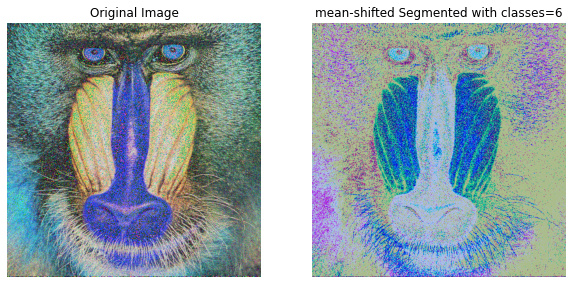

In [ ]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2
  
fig.add_subplot(rows, columns, 1)
  
plt.imshow(imagec)
plt.axis('off')
plt.title("Original Image")
  
fig.add_subplot(rows, columns, 2)
  

plt.imshow(image_seg)
plt.axis('off')
plt.title("mean-shifted Segmented with classes=%1.0f" %k)

**Mean Shift 2**

Gray Scale based determination of centroids and extrapolating them for all RGB layers

In [ ]:
k=6

X,Y=MeanShifter2(image,k,iterations=2,threshold=60)

Pixelians=[]

for i in range(len(X)):
  Pixelians.append(imagec[X[i],Y[i],:])


le,wid,ch=imagec.shape
dis_min_finder=np.zeros(len(Pixelians))
image_seg_2=np.copy(imagec)

for y in range(le):
  for x in range(wid):
    for i in range(len(Pixelians)):
      ref=Pixelians[i]
      cur=imagec[x,y,:]
      dist_i=np.linalg.norm(ref-cur)
      dis_min_finder[i]=dist_i

    indx=np.argmin(dis_min_finder)
    image_seg_2[x,y,:]=Pixelians[indx]

Text(0.5, 1.0, 'mean-shifted Segmented with classes=6')

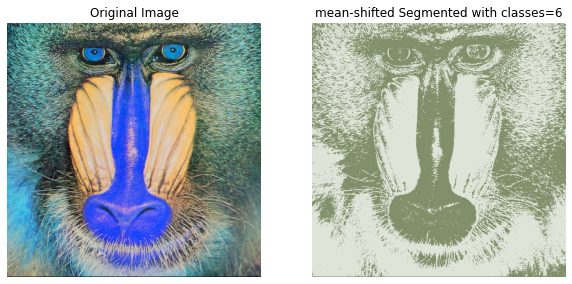

In [ ]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2
  
fig.add_subplot(rows, columns, 1)
  
plt.imshow(imagec)
plt.axis('off')
plt.title("Original Image")
  
fig.add_subplot(rows, columns, 2)
  

plt.imshow(image_seg_2)
plt.axis('off')
plt.title("mean-shifted Segmented with classes=%1.0f" %k)

Determination of centroids for individual RGB layers

In [ ]:
# 2 iterations
k=6

X1,Y1=MeanShifter2(imagec[:,:,0],k,iterations=2,threshold=60)
X2,Y2=MeanShifter2(imagec[:,:,1],k,iterations=2,threshold=60)
X3,Y3=MeanShifter2(imagec[:,:,2],k,iterations=2,threshold=60)
Pixelians1=[]
Pixelians2=[]
Pixelians3=[]

for i in range(len(X)):
  Pixelians1.append(imagec[X1[i],Y1[i],0])
  Pixelians2.append(imagec[X2[i],Y2[i],1])
  Pixelians3.append(imagec[X3[i],Y3[i],2])


le,wid,ch=imagec.shape
dis_min_finder1=np.zeros(len(Pixelians1))
dis_min_finder2=np.zeros(len(Pixelians2))
dis_min_finder3=np.zeros(len(Pixelians3))
image_seg=np.copy(imagec)

for y in range(le):
  for x in range(wid):
    for i in range(len(Pixelians1)):
      ref1=Pixelians1[i]
      ref2=Pixelians2[i]
      ref3=Pixelians3[i]
      cur1=imagec[x,y,0]
      cur2=imagec[x,y,1]
      cur3=imagec[x,y,2]
      dist_1=np.linalg.norm(ref1-cur1)
      dist_2=np.linalg.norm(ref2-cur2)
      dist_3=np.linalg.norm(ref3-cur3)
      dis_min_finder1[i]=dist_1
      dis_min_finder2[i]=dist_2
      dis_min_finder3[i]=dist_3

    indx1=np.argmin(dis_min_finder1)
    indx2=np.argmin(dis_min_finder2)
    indx3=np.argmin(dis_min_finder3)
    image_seg[x,y,0]=Pixelians1[indx1]
    image_seg[x,y,1]=Pixelians2[indx2]
    image_seg[x,y,2]=Pixelians3[indx3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in ubyte_scalars


Text(0.5, 1.0, 'mean-shifted Segmented with classes=6')

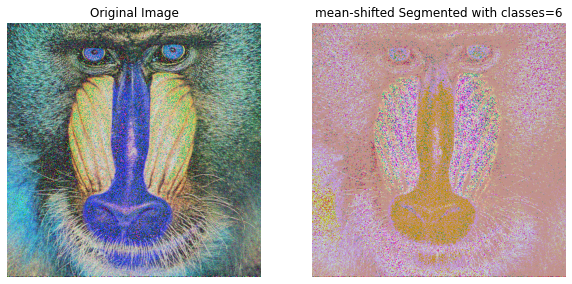

In [ ]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2
  
fig.add_subplot(rows, columns, 1)
  
plt.imshow(imagec)
plt.axis('off')
plt.title("Original Image")
  
fig.add_subplot(rows, columns, 2)
  

plt.imshow(image_seg)
plt.axis('off')
plt.title("mean-shifted Segmented with classes=%1.0f" %k)